In [97]:
!pip install opencv-python==4.5.2.52

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow import expand_dims
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.resnet import preprocess_input



In [99]:

!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [135]:
# link = 'https://drive.google.com/file/d/1-huYEgNdTg-t4yUNeeyfVnYLnVSc44eA/view?usp=sharing'
  
# import pandas as pd
  
# # to get the id part of the file
# id = link.split("/")[-2]
  
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('icml_face_data.csv')  
  
# data = pd.read_csv('icml_face_data.csv')
# print(data)

In [136]:
# data.drop_duplicates(inplace=True)

In [ ]:
# data.reset_index(drop = True, inplace = True)

In [ ]:
# data.columns=['emotion', 'usage', 'pixels']

In [ ]:
# df = data.copy()

In [ ]:
# df = df[df.emotion != 1]
df.reset_index(drop = True, inplace = True)

In [ ]:
# df.emotion.value_counts()/len(df.emotion)

3    0.259323
6    0.178707
4    0.174960
2    0.144166
0    0.140507
5    0.102336
Name: emotion, dtype: float64

In [ ]:
# for i in range(len(df.pixels)):
#   test_str = df.pixels[i]
#   test_list = test_str.split(' ')
#   df.pixels[i] = np.asarray(test_list).reshape(48,48).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


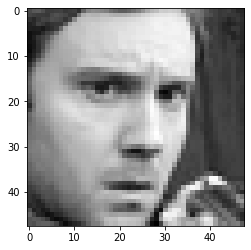

In [ ]:
# plt.imshow(df.pixels[0], cmap='gray')

In [ ]:
# df_train = df[df['usage']=='Training']
# df_train.reset_index(drop = True, inplace = True)
# len(df_train)

27134

In [ ]:
# df_test = df[df['usage']=='PublicTest']

In [ ]:
# df_test = df_test.append(df[df['usage']=='PrivateTest'])
# df_test.reset_index(drop = True, inplace = True)

In [ ]:
# df_train.drop(columns = 'usage', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# df_test.drop(columns = 'usage', inplace = True)

In [ ]:
# X_train = df_train.pixels
# y_train = df_train.emotion
# X_test = df_test.pixels
# y_test = df_test.emotion

In [ ]:
# X_train = [X_train[i] for i in range(len(X_train))] # create a list with all our records
# X_train = np.dstack(X_train)
# print(X_train.shape)
# X_train = np.rollaxis(X_train, -1)
# print(X_train.shape)

(48, 48, 27134)
(27134, 48, 48)


In [ ]:
# X_test = [X_test[i] for i in range(len(X_test))] # create a list with all our records
# X_test = np.dstack(X_test)
# print(X_test.shape)
# X_test = np.rollaxis(X_test, -1)
# print(X_test.shape)

(48, 48, 7028)
(7028, 48, 48)


In [ ]:
# df_train.emotion.value_counts()

3    7087
6    4874
4    4733
2    3909
0    3849
5    2682
Name: emotion, dtype: int64

In [ ]:
# y_train = y_train - 1
# y_test = y_test - 1

In [ ]:
# y_train = to_categorical(y_train, num_classes=6)
# y_test = to_categorical(y_test, num_classes=6)

In [ ]:
# X_train = np.expand_dims(X_train, axis = -1)

In [ ]:
# X_test = np.expand_dims(X_test, axis = -1)

In [ ]:
# X_train = X_train / 255.
# X_test = X_test / 255.

In [ ]:
# model = Sequential()
# #model.add(Rescaling(1./255, input_shape=(48,48,1)))

# #reg_l1 = regularizers.L1(0.01)
# #reg_l2 = regularizers.L2(0.01)
# #reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

# model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same',activation='relu', input_shape=(48,48,1)))
# model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'))
# model.add(layers.MaxPooling2D(3))

# model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same',activation="relu"))
# model.add(layers.MaxPooling2D(3))
# model.add(Dropout(0.2))

# model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same',activation="relu"))
# model.add(layers.MaxPooling2D(2))
# model.add(Dropout(0.3))

# model.add(layers.Flatten())
# model.add(layers.Dense(1024, activation='relu'))
# model.add(Dropout(0.5))

# model.add(layers.Dense(6, activation='softmax'))
    
# opt = optimizers.Adam(learning_rate=1e-4, decay=1e-6)
# model.compile(loss='categorical_crossentropy',
#                   optimizer=opt,
#                   metrics=['accuracy'])

In [ ]:
es = EarlyStopping(patience=20, verbose=1, restore_best_weights=True)
#monitor='val_accuracy', mode='max', 
history = model.fit(X_train, y_train,
         batch_size=48, 
         epochs=1, 
         validation_split=0.2,
         callbacks=[es])

453/453 [==============================] - 6s 11ms/step - loss: 1.5658 - accuracy: 0.3065 - val_loss: 1.5271 - val_accuracy: 0.3238


import trained model

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [101]:
import joblib
import keras

In [104]:
# local_model_name = 'model.joblib'
# joblib.dump(model, local_model_name)
# print("saved model.joblib locally")

# model.save('test_model')
# print("saved model locally")
model2 = keras.models.load_model('/content/drive/MyDrive/MusicWIthEmotions/model_65')

In [105]:
# !pip install opencv-python==4.5.2.52
import cv2

img = cv2.imread('simopic2.jpg')  #  example of picture load

def user_pic_preproc(img, bor=0):
    '''convert user picture to grayscale, identify and extract the face and compress to 48 x 48 pixels'''
    face_model = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    print(face_model)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(gray.shape)
    faces = face_model.detectMultiScale(gray, 1.2, 15)
    print(faces)
    
    # set additional border to face detection for picture extraction 
    x, y, w, h = faces[0]
    x2 = int(round((x - bor * w), 0))  # x 
    y2 = int(round((y - bor * h), 0))  # y
    w2 = int(round((w * (1 + 2 * bor)), 0))  # width of extraction
    h2 = int(round((h * (1 + 2 * bor)), 0))  # height of extraction
    
    img_face = gray[y2 : y2 + h2, x2 : x2 + w2]
    img_resized = cv2.resize(img_face, (48, 48), interpolation = cv2.INTER_AREA)
    img_expanded = np.expand_dims(img_resized, axis = [0, -1])
    
    return img_expanded

In [106]:
img.shape
img_preproc = user_pic_preproc(img)
img_preproc.shape

<CascadeClassifier 0x7faf2c8862f0>
(720, 1080)
[[445 249 296 296]]


(1, 48, 48, 1)

In [111]:
res = model.predict(img_preproc)
res

array([[0.0000000e+00, 5.9315820e-33, 4.0164374e-09, 5.3986784e-36,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

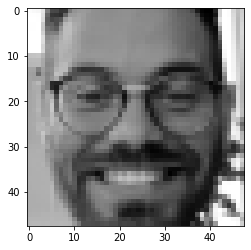

In [117]:
np.squeeze(img_preproc, (0,-1)).shape
plt.imshow(np.squeeze(img_preproc,(0,-1)), cmap='gray')

In [122]:
emotions_2 = {0:'Angry', 1:'Fear', 2:'Happy', 3:'Sad', 4:'Surprise', 5:'Neutral'}

In [134]:
# res.index(min(res))
ind = np.argmax(res)
predicted_emotion = emotions_2.get(ind)
predicted_emotion

'Neutral'

In [118]:
img = cv2.imread('simopic.jpg')
img_preproc = user_pic_preproc(img)
res = model.predict(img_preproc)
res

<CascadeClassifier 0x7faf2ac115b0>
(720, 1080)
[[402 286 311 311]]


array([[0.0000000e+00, 1.8906477e-33, 3.0241957e-12, 1.6233535e-36,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [120]:
img = cv2.imread('simopic4.jpg')
img_preproc = user_pic_preproc(img)
res = model.predict(img_preproc)
res

<CascadeClassifier 0x7faf2ac31150>
(720, 1080)
[[422 148 342 342]]


array([[0.0000000e+00, 2.8929649e-31, 1.1968434e-07, 5.8868325e-34,
        0.0000000e+00, 9.9999988e-01]], dtype=float32)